In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
import time
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# 绘图函数
import matplotlib.pyplot as plt
def draw_loss(train_loss, test_loss):
    x = np.linspace(0, len(train_loss), len(train_loss))
    plt.plot(x, train_loss, label="Train Loss", linewidth=1.5)
    plt.plot(x, test_loss, label="Test Loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [3]:
# 定义模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output = self.hidden_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output

In [4]:
# 设置随机种子
torch.manual_seed(1)
np.random.seed(1)

num_inputs = 500
num_examples = 10000
x_features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
y_labels = torch.mm(x_features,torch.ones(500,1)*0.0056) + 0.028
y_labels += torch.tensor(np.random.normal(0, 0.01, size=y_labels.size()), dtype=torch.float)
#训练集
train_features = x_features[:7000]
train_labels = y_labels[:7000]
#测试集
test_features = x_features[7000:]
test_labels = y_labels[7000:]

dataset_train = TensorDataset(train_features, train_labels)
dataset_test = TensorDataset(test_features , test_labels )
batch_size = 64
train_iter = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = DataLoader(dataset=dataset_test , batch_size=batch_size, shuffle=True, num_workers=0)

In [5]:
# 测试函数
def test1(data_iter,net,loss_func) :
    test_loss_sum,c = 0.0,0
    for X, y in data_iter:
        result = net.forward(X)
        test_loss_sum+= loss_func(result, y).item()
        c +=1
    return test_loss_sum/c

In [6]:
# 训练函数
def train1(net, train_iter,loss_func, num_epochs, lr, optimizer):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n,c = 0.0,0.0,0,0
        for X,y in train_iter: 
            y_hat = net(X)
            l=loss_func(y_hat, y)
            # 梯度清零
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_loss = test1(test_iter, net,loss_func)
        train_loss_list.append(train_l_sum/c)
        test_loss_list.append(test_loss)
        print('epoch %d, train_loss %.4f, test_loss %.4f' % (epoch+1, train_l_sum/c, test_loss))
    return train_loss_list,test_loss_list

epoch 1, train_loss 0.0159, test_loss 0.0150
epoch 2, train_loss 0.0149, test_loss 0.0141
epoch 3, train_loss 0.0140, test_loss 0.0134
epoch 4, train_loss 0.0131, test_loss 0.0125
epoch 5, train_loss 0.0122, test_loss 0.0117
epoch 6, train_loss 0.0112, test_loss 0.0108
epoch 7, train_loss 0.0102, test_loss 0.0099
epoch 8, train_loss 0.0091, test_loss 0.0089
epoch 9, train_loss 0.0080, test_loss 0.0079
epoch 10, train_loss 0.0069, test_loss 0.0069
epoch 11, train_loss 0.0059, test_loss 0.0060
epoch 12, train_loss 0.0050, test_loss 0.0052
epoch 13, train_loss 0.0042, test_loss 0.0044
epoch 14, train_loss 0.0035, test_loss 0.0038
epoch 15, train_loss 0.0029, test_loss 0.0033
epoch 16, train_loss 0.0024, test_loss 0.0029
epoch 17, train_loss 0.0021, test_loss 0.0026
epoch 18, train_loss 0.0018, test_loss 0.0023
epoch 19, train_loss 0.0016, test_loss 0.0021
epoch 20, train_loss 0.0014, test_loss 0.0019
time spend: 3.869830 second


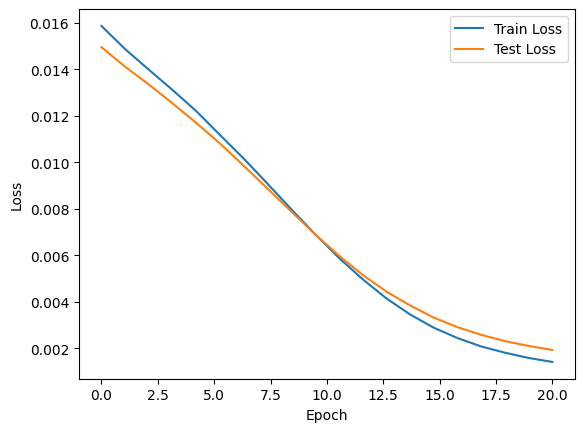

In [7]:
indim = 500
outdim = 1
hiddendim = 256
net = Net()
num_epochs = 20
lr = 0.01
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train1(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

In [8]:
# 生成二分类数据集
import torch
from matplotlib import pyplot as plt
 
num_inputs = 200
#1类
x1 = torch.normal(1,1,(10000, num_inputs))
y1 = torch.ones(10000,1)
x1_train = x1[:7000]
x1_test  = x1[7000:]
#0类
x2 = torch.normal(-1,1,(10000, num_inputs))
y2 = torch.zeros(10000,1)
x2_train = x2[:7000]
x2_test = x2[7000:]
 
# 合并训练集
train_features = torch.cat((x1_train,x2_train), 0).type(torch.FloatTensor)
train_labels = torch.cat((y1[:7000], y2[:7000]), 0).type(torch.FloatTensor)
# 合并测试集
test_features = torch.cat((x1_test,x2_test), 0).type(torch.FloatTensor)
test_labels = torch.cat((y1[7000:], y2[7000:]), 0).type(torch.FloatTensor)

dataset_train = TensorDataset(train_features, train_labels)
dataset_test = TensorDataset(test_features , test_labels )
batch_size = 128
train_iter = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = DataLoader(dataset=dataset_test , batch_size=batch_size, shuffle=True, num_workers=0)

In [9]:
# 评价函数
def test2(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        y_pred = (result > 0.5).float() # convert to binary
        acc_sum += (y_pred == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [10]:
# 训练函数
def train2(net, train_iter,loss_func, num_epochs,lr, optimizer):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n,c = 0.0,0.0,0,0
        for X,y in train_iter: 
            y_hat = net(X)
            l=loss_func(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            y_pred = (y_hat > 0.5).float() # convert to binary
            train_acc_sum += (y_pred == y).float().sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = test2(test_iter, net,loss_func)
        train_loss_list.append(train_l_sum/c)
        test_loss_list.append(test_loss)
        print('epoch %d, train_loss %.4f, test_loss %.4f, train_acc %.3f, test_acc %.3f' % (epoch+1, train_l_sum/c, test_loss, train_acc_sum/n, test_acc))
    return train_loss_list,test_loss_list

epoch 1, train_loss 0.3628, test_loss 0.0629, train_acc 0.791, test_acc 1.000
epoch 2, train_loss 0.0292, test_loss 0.0145, train_acc 1.000, test_acc 1.000
epoch 3, train_loss 0.0101, test_loss 0.0073, train_acc 1.000, test_acc 1.000
epoch 4, train_loss 0.0058, test_loss 0.0047, train_acc 1.000, test_acc 1.000
epoch 5, train_loss 0.0039, test_loss 0.0034, train_acc 1.000, test_acc 1.000
epoch 6, train_loss 0.0029, test_loss 0.0026, train_acc 1.000, test_acc 1.000
epoch 7, train_loss 0.0023, test_loss 0.0021, train_acc 1.000, test_acc 1.000
epoch 8, train_loss 0.0019, test_loss 0.0018, train_acc 1.000, test_acc 1.000
epoch 9, train_loss 0.0016, test_loss 0.0015, train_acc 1.000, test_acc 1.000
epoch 10, train_loss 0.0014, test_loss 0.0013, train_acc 1.000, test_acc 1.000
epoch 11, train_loss 0.0012, test_loss 0.0012, train_acc 1.000, test_acc 1.000
epoch 12, train_loss 0.0011, test_loss 0.0011, train_acc 1.000, test_acc 1.000
epoch 13, train_loss 0.0010, test_loss 0.0010, train_acc 1.00

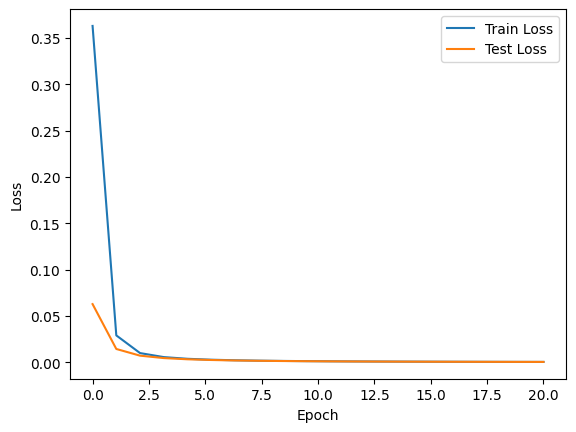

In [11]:
indim = 200
outdim = 1
hiddendim = 128
net = Net()
num_epochs = 20
lr = 0.01
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train2(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

In [12]:
# minist数据集
mnist_train = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=False, transform=transforms.ToTensor())
 
# 通过DataLoader 读取小批量数据样本
batch_size = 32
train_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [13]:
# 评价函数
def evaluate_accuracy(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        acc_sum += (result.argmax(dim=1) == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [14]:
def train3(net, train_iter, loss_func, num_epochs, lr, optimizer):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, c = 0.0,0.0, 0,0
        for X,y in train_iter:
            y_hat = net(X)
            l = loss_func(y_hat,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = evaluate_accuracy(test_iter, net, loss_func)
        train_loss_list.append(train_l_sum / c)
        test_loss_list.append(test_loss)
        print(' epoch %d, train loss %.4f, test loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1,train_l_sum / c, test_loss, train_acc_sum / n, test_acc))
    return train_loss_list, test_loss_list

 epoch 1, train loss 1.1771, test loss 0.4789, train acc 0.724, test acc 0.876
 epoch 2, train loss 0.4143, test loss 0.3484, train acc 0.887, test acc 0.902
 epoch 3, train loss 0.3410, test loss 0.3052, train acc 0.903, test acc 0.912
 epoch 4, train loss 0.3074, test loss 0.2816, train acc 0.913, test acc 0.921
 epoch 5, train loss 0.2834, test loss 0.2608, train acc 0.920, test acc 0.926
 epoch 6, train loss 0.2632, test loss 0.2441, train acc 0.925, test acc 0.931
 epoch 7, train loss 0.2455, test loss 0.2279, train acc 0.931, test acc 0.936
 epoch 8, train loss 0.2296, test loss 0.2153, train acc 0.936, test acc 0.939
 epoch 9, train loss 0.2156, test loss 0.2022, train acc 0.940, test acc 0.941
 epoch 10, train loss 0.2027, test loss 0.1943, train acc 0.943, test acc 0.943
 epoch 11, train loss 0.1914, test loss 0.1820, train acc 0.947, test acc 0.947
 epoch 12, train loss 0.1810, test loss 0.1743, train acc 0.949, test acc 0.949
 epoch 13, train loss 0.1717, test loss 0.1644, t

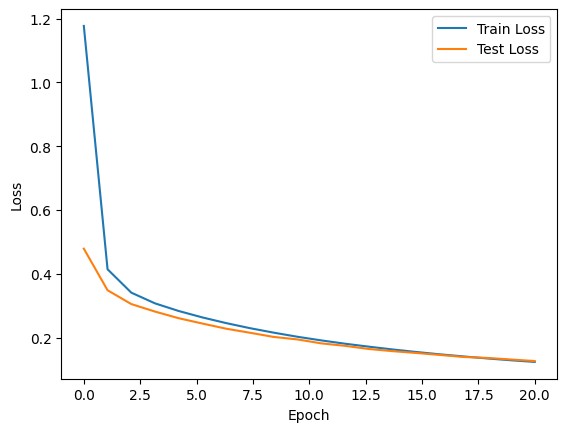

In [15]:
indim = 784
outdim = 10
hiddendim = 256
net = Net()
num_epochs = 20
lr = 0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train3(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)